# Churn in Syria Telecommunication Company

We are going to perform a predictive analysis for a telecommunication company in order to provide solid insights for potential future churn.

Specifically, this will cover:

* Performing a train-test split to evaluate model performance on unseen data
* Applying appropriate preprocessing steps to training and test data
* Identifying overfitting and underfitting

### Data Understanding

I will be using the Churn in Telecom's dataset, modeling the `churn` based on all other numeric features of the dataset. ([dataset here](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset/data))

#### Let's import libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    RocCurveDisplay,
    accuracy_score
)

#### Quick EDA

In [2]:
# Load dataset
df = pd.read_csv("Data/churn_dataset.csv", index_col=0)
# Preview
print(df.head())

       account length  area code phone number international plan  \
state                                                              
KS                128        415     382-4657                 no   
OH                107        415     371-7191                 no   
NJ                137        415     358-1921                 no   
OH                 84        408     375-9999                yes   
OK                 75        415     330-6626                yes   

      voice mail plan  number vmail messages  total day minutes  \
state                                                             
KS                yes                     25              265.1   
OH                yes                     26              161.6   
NJ                 no                      0              243.4   
OH                 no                      0              299.4   
OK                 no                      0              166.7   

       total day calls  total day charge  total eve m

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3333 entries, KS to TN
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   area code               3333 non-null   int64  
 2   phone number            3333 non-null   object 
 3   international plan      3333 non-null   object 
 4   voice mail plan         3333 non-null   object 
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   float6

In [4]:
# Ensure churn is numeric
df['churn'] = df['churn'].map({True:1, False:0})
print(df['churn'].value_counts())

churn
0    2850
1     483
Name: count, dtype: int64


In [5]:
# --- Missing values check ---
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


In [6]:
print("\nPercentage of missing values:")
print((df.isnull().mean() * 100).round(2))


Percentage of missing values:
account length            0.0
area code                 0.0
phone number              0.0
international plan        0.0
voice mail plan           0.0
number vmail messages     0.0
total day minutes         0.0
total day calls           0.0
total day charge          0.0
total eve minutes         0.0
total eve calls           0.0
total eve charge          0.0
total night minutes       0.0
total night calls         0.0
total night charge        0.0
total intl minutes        0.0
total intl calls          0.0
total intl charge         0.0
customer service calls    0.0
churn                     0.0
dtype: float64


##### Since we have no missing values, we can follow with the modeling step

### Modeling

For the current matter I will build **two models** : 
1) A Logistic regression as the baseline model.
2) A Decision tree model as the second one, more complexe and finally tune it for more improvement.

For this reason I will first perform a **train-test split**, so that I am fitting the model using the training dataset and evaluating the model using the testing dataset.


### Requirements

#### 1. Perform a Train-Test Split

#### 2. Fit a `Logistic regression` Model

#### 3. Fit a `Decision tree` Model

#### 4. Fit a `Decision tree Tuned` Model ( Improve the previous model )

#### 5. Compare the models

#### 6. Determine feature importance

## 1. Train-Test Split

The target is `churn`, let's split the dataset into endog (X) and exog (y). 20% of the data will be used for test (80% in the trai set)

In [7]:
# Separate features and target
X = df.drop("churn", axis=1)
y = df["churn"]

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Train-test split with stratification (keeps class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale only numeric columns (not the one-hot encoded dummies)
numeric_cols = X.select_dtypes(include=np.number).columns
scaler = StandardScaler()

X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# 2. Fit a Logistic Regresssion Model

This is our baseline model. We will use StandardScaler class to scale sets data

In [8]:
# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=np.number))
X_test_scaled = scaler.transform(X_test.select_dtypes(include=np.number))

log_reg = LogisticRegression(max_iter=1000, class_weight="balanced")
log_reg.fit(X_train_scaled, y_train)

y_pred_log = log_reg.predict(X_test_scaled)
y_prob_log = log_reg.predict_proba(X_test_scaled)[:,1]

print("Logistic Regression Results")
print(classification_report(y_test, y_pred_log))

Logistic Regression Results
              precision    recall  f1-score   support

           0       0.93      0.71      0.80       570
           1       0.28      0.67      0.40        97

    accuracy                           0.70       667
   macro avg       0.60      0.69      0.60       667
weighted avg       0.83      0.70      0.74       667



##### Plot
Let's plot a confusion matrix for a better obeservation of TP FP FN TN

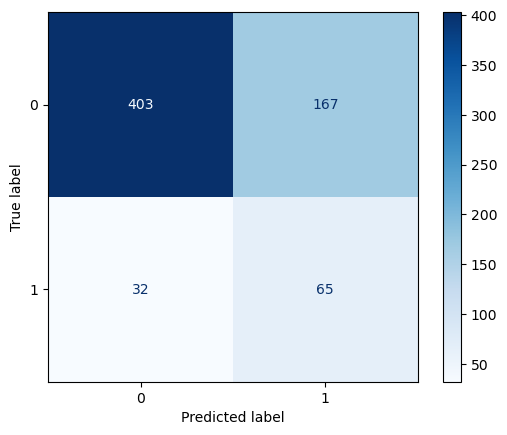

In [9]:
cm = confusion_matrix(y_test, y_pred_log)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")

In [10]:
print("ROC AUC:", roc_auc_score(y_test, y_prob_log))

ROC AUC: 0.7473865075058781


##### Since ROC AUC is between 0.70–0.75, the model is reasonably good but not strong enough for precise targeting.
This indicates that while it distinguishes churners from non-churners, it may still make false positives/negatives.

## 3. Fit a `Decision Tree` Model

Now that we have our simple regression model implemented and we saw ROC AUC indicate a fair preditive model, but we want to be reliable. 

For that we'll fit a Decision tree classifier

In [11]:
tree = DecisionTreeClassifier(random_state=42, class_weight="balanced")
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)

print("Decision Tree Results")
print(classification_report(y_test, y_pred_tree))

Decision Tree Results
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       570
           1       0.69      0.67      0.68        97

    accuracy                           0.91       667
   macro avg       0.82      0.81      0.81       667
weighted avg       0.91      0.91      0.91       667



#### We have now an accuracy of 0.91 which is pretty close to 1
This is better compared to the Logistic regression model. 
But what if we still improved that model ?

## 4. Improved Model — Hyperparameter Tuning

In [12]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid.fit(X_train, y_train)

best_tree = grid.best_estimator_
y_pred_best = best_tree.predict(X_test)

print("Tuned Decision Tree Parameters:", grid.best_params_)
print(classification_report(y_test, y_pred_best))

Tuned Decision Tree Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       570
           1       0.89      0.65      0.75        97

    accuracy                           0.94       667
   macro avg       0.92      0.82      0.86       667
weighted avg       0.93      0.94      0.93       667



##### Now we're even closer to 1 with an accuracy of 0.94.
Now let's compare the model since accuracy itself cannot determine which model is best-suited depending on what features matter to our business.

## 5. Model Comparison

In [13]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Tuned Decision Tree"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_tree),
        accuracy_score(y_test, y_pred_best)
    ],
    "ROC AUC": [
        roc_auc_score(y_test, y_prob_log),
        roc_auc_score(y_test, tree.predict_proba(X_test)[:,1]),
        roc_auc_score(y_test, best_tree.predict_proba(X_test)[:,1])
    ]
})

print(results)

                 Model  Accuracy   ROC AUC
0  Logistic Regression  0.701649  0.747387
1        Decision Tree  0.908546  0.809613
2  Tuned Decision Tree  0.937031  0.794041


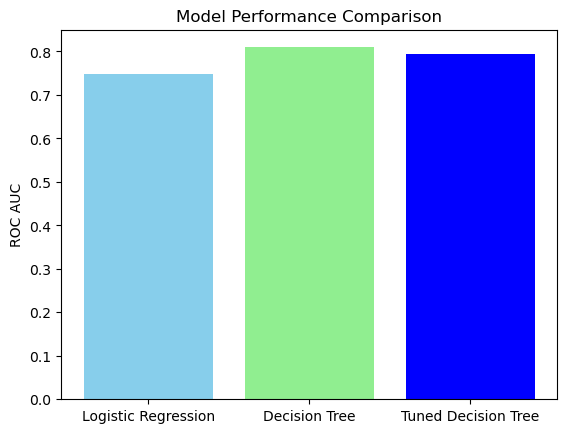

In [14]:
auc_scores = {
    "Logistic Regression": roc_auc_score(y_test, y_prob_log),
    "Decision Tree": roc_auc_score(y_test, tree.predict_proba(X_test)[:,1]),
    "Tuned Decision Tree": roc_auc_score(y_test, best_tree.predict_proba(X_test)[:,1])
}

plt.bar(auc_scores.keys(), auc_scores.values(), color=["skyblue", "lightgreen","blue"])
plt.ylabel("ROC AUC")
plt.title("Model Performance Comparison")
plt.show()

#### Observation
Though decision tree accuracy is higher than logistic regression, which means complex patterns are important in churn prediction, but ROC AUC difference is not too much and Logistic regression seems to be stable.

The real difference is in the Tuned one, since AUC is **0.80** which means we have a more balanced bias/variance.

## 6. Feature importance

                     feature  importance
3          total day minutes    0.256431
15    customer service calls    0.138986
14         total intl charge    0.098046
6          total eve minutes    0.093712
3349     voice mail plan_yes    0.082091
3348  international plan_yes    0.081776
13          total intl calls    0.069651
8           total eve charge    0.033640
11        total night charge    0.026976
5           total day charge    0.017616


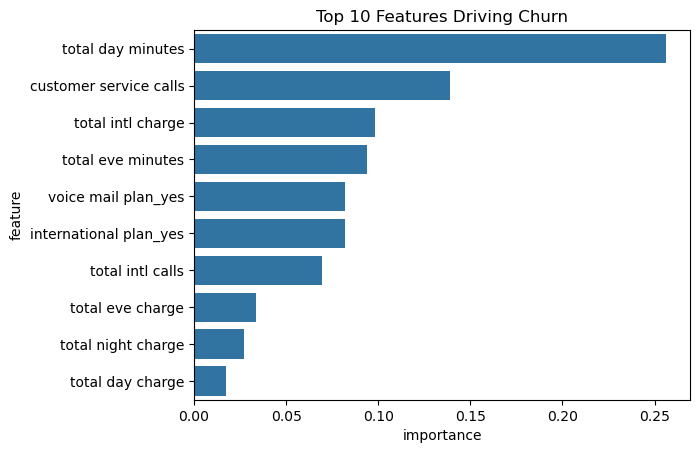

In [15]:
importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_tree.feature_importances_
}).sort_values(by='importance', ascending=False)

print(importances.head(10))

sns.barplot(data=importances.head(10), x="importance", y="feature")
plt.title("Top 10 Features Driving Churn")
plt.show()

#### Business Recommendations

After training and analysis we come out with some insights that could help predict and potentially reduce churn in the company business.

1. Best Model Recommendation would be Tuned Decision tree since it has the highest ROC AUC score compared to Logistic Regression.
2. Customers who spend more time per day tend to churn the most, that may due to the service charging fees. Therefore I would recommend to propose affordable service bundle.
3. Another factor which is related to churn is customer service calls. Either the customer is not satify after calling, or he cannot find people to take his case in consideration. Then I would recommend to improve customer service experience.
